In [4]:
import os
import numpy as np
import geopandas as gpd

In [5]:
os.chdir(r"C:\Users\Khalil\Desktop\Landslide\data_landslide")

In [6]:
data = gpd.read_file('landslide_data.shp')
data.describe()

,landslide,aspect,curvature,dem,dis_fault,dis_rivers,dis_roads,geology,ndvi,slope,TWI
count,640.00000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,0.41875,166.984967,-0.158876,1053.575000,1452.301383,1195.676047,719.531573,6.146875,0.524895,16.664896,7.882380
std,0.49374,112.211997,1.893981,852.998185,1345.255677,987.561083,992.118681,5.634151,0.236297,15.692226,3.509078
min,0.00000,-0.000000,-18.780000,-24.000000,0.000000,0.000000,0.000000,0.000000,-0.085106,0.000000,0.000000
25%,0.00000,64.441675,-0.402429,414.500000,444.466000,295.331000,95.417900,3.000000,0.327256,3.006413,5.621005
50%,0.00000,163.225000,-0.000000,778.500000,967.386500,1039.680000,297.834000,4.000000,0.595888,10.031350,6.776150
75%,1.00000,270.000000,0.402429,1670.250000,2105.675000,1834.260000,936.991000,6.000000,0.746591,30.082875,8.897583
max,1.00000,358.387000,10.194900,3765.000000,8547.170000,4391.850000,6444.110000,29.000000,0.816307,67.205100,24.460600


In [7]:
data_array = np.array(data)
data

,landslide,aspect,curvature,dem,dis_fault,dis_rivers,dis_roads,geology,ndvi,slope,TWI,geometry
0,1,200.3480,0.134143,1979,1621.970,1202.590,159.204,4,0.640719,9.79564,5.51556,POINT Z (698717.758 3987265.427 0)
1,1,56.3938,-0.268286,2373,891.445,2934.820,136.517,4,0.223214,33.92810,4.88805,POINT Z (660286.607 3985370.803 0)
2,1,350.1060,5.499870,493,1001.330,675.447,628.570,6,0.723589,46.44230,3.60129,POINT Z (669162.406 4015433.251 0)
3,1,301.1580,2.012150,501,1306.570,273.033,342.110,3,0.687533,33.30540,5.15042,POINT Z (669985.232 4016236.274 0)
4,1,-0.0000,-0.134143,478,911.294,213.246,610.521,3,0.706312,26.64850,6.34193,POINT Z (672826.651 4016706.5 0)
...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,320.5080,-0.134143,1987,613.566,2244.360,371.366,4,0.584678,10.69100,6.63453,POINT Z (699711.538 3986952.664 0)
636,0,31.7209,-0.134143,1936,810.408,2294.940,172.682,4,0.561526,6.51402,8.06491,POINT Z (699793.433 3987398.593 0)
637,0,17.1745,-0.268286,1929,993.857,2198.050,115.838,4,0.583911,7.71918,6.87510,POINT Z (699693.641 3987577.574 0)
638,0,180.0000,0.134143,1971,1749.550,1623.570,426.492,4,0.582831,1.85433,7.33461,POINT Z (698604.838 3988513.495 0)


In [8]:
X = data_array[:,1:11]
X.shape

(640, 10)

In [9]:
Y = data_array[:,:1]
# one_columns = np.ones((640,1))
# Y = np.column_stack([Y, one_columns])
Y= Y.astype(int)
Y.shape

(640, 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42,)
print('shape of X train', X_train.shape)
print("shape of X test", X_test.shape)
print("shape of y train", y_train.shape)
print("shape of y test", y_test.shape)

shape of X train (512, 10)
shape of X test (128, 10)
shape of y train (512, 1)
shape of y test (128, 1)


In [11]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the model
model_rf = RandomForestRegressor()

# Fit the model
model_rf.fit(X_train_scaled, y_train)


# Predict on the test data
y_pred = model_rf.predict(X_test_scaled)

# Calculate the mean squared error
accuracy = mean_squared_error(y_test, y_pred)

# Print the best hyperparameters and performance
print("Mean Squared Error:", accuracy)


C:\Users\Khalil\AppData\Local\Temp\ipykernel_94744\4270608766.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train_scaled, y_train)


Mean Squared Error: 0.02933671875


In [29]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define the model
model_svm = SVR()

# Fit the model
model_svm.fit(X_train_scaled, y_train)


# Predict on the test data
y_pred = model_rf.predict(X_test_scaled)

# Calculate the mean squared error
accuracy = mean_squared_error(y_test, y_pred)

# Print the best hyperparameters and performance
print("Mean Squared Error:", accuracy)


Mean Squared Error: 0.02933671875


c:\Users\Khalil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
import rasterio 
landslide = rasterio.open('landslide_co11.tif')
landslide_array = landslide.read()
landslide_reshape = landslide_array.reshape(landslide_array.shape[0],-1).T
landslide_reshape.shape
landslide_array.shape

(10, 4167, 2878)

In [22]:
revise_nan = np.nan_to_num(landslide_reshape)
revise_nan[revise_nan == -3.4028235e+38] = 0
revise_nan = scaler.transform(revise_nan)


c:\Users\Khalil\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [30]:
prediction = model_svm.predict(revise_nan)


In [31]:
prediction.shape

(11992626,)

In [32]:
proability_reshape = prediction.reshape((4167, 2878))

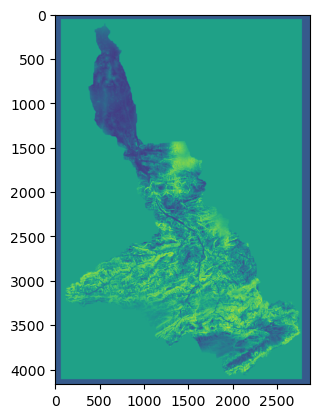

In [33]:
import matplotlib.pyplot as plt 
plt.imshow(proability_reshape)

In [34]:
# Define output file path
output_file = r"C:\Users\Khalil\Desktop\Landslide\data_landslide\svm_model.tif"

# Get CRS from Landsat image
crs = landslide.crs

# Define the profile for the output file
profile = {
    'driver': 'GTiff',
    'width': proability_reshape.shape[1],
    'height': proability_reshape.shape[0],
    'count': 1,  # Number of bands in the output image
    'dtype': 'float32',  # Change the dtype as needed
    'crs': crs,
    'transform': landslide.transform,  # Use the same transform as Landsat image
    'nodata': 0  # Define nodata value
}

# Write the predicted image to the output file
with rasterio.open(output_file, 'w', **profile) as dst:
    dst.write(proability_reshape.astype(rasterio.float32), 1)  # Write the predicted image to the first band

print("Predicted landslide prediction image saved as", output_file)


Predicted landslide prediction image saved as C:\Users\Khalil\Desktop\Landslide\data_landslide\svm_model.tif
